In [124]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt
import scipy.sparse as sp


# Tải dữ liệu data X và y đã được xử lý thành ma trận
labels = np.load('D:/Document/Machine_Learning/CS3/label.npy') 
features = sp.load_npz('D:/Document/Machine_Learning/CS3/tfidf.npz')

def add_bias(features, labels):
    '''
    features là ma trận N*X với N là số datapoint, X là số term trong dictionary
    labels là ma trận N*1 với N là số datapoint
    
    Hàm trả về ma trận features(sau khi đã thêm 1 cột bias giá trị 1 cho tất cả các phần tử) và labels
    '''
    # Thêm cột giá trị bias cho dữ liệu
    labels_final = sp.csr_matrix(labels, shape = (1, len(labels)))
    matrix_ones = sp.csc_matrix((26709,1),dtype=np.float)
    matrix_ones[:]=1
    matrix_final_features= sp.csc_matrix(sp.hstack((features,matrix_ones)))
    return matrix_final_features, labels_final

# chia Train và test
matrix_final_features, labels_final = add_bias(features, labels)
X_Train = matrix_final_features[:20000]
X_test = matrix_final_features[20000:]
y_Train = labels_final.T[:20000]
y_test = labels_final.T[20000:]

# Hàm Sigmoid

In [125]:
def sigmoid(z):
    # hàm sigmoid
    '''
    z là model đầu ra Linear Regression
    np.exp là e mũ
    Hàm trả về sigmoid của z
    
    '''
    return 1/(1+np.exp(-z))

# Hàm Cost Function

In [126]:
def Cost_Function(w, y, X):
    '''
    w là ma trận bộ tham số có shape bằng (1,X.shape[1])
    X là features
    y là y labels
    Hàm trả về cost tương ứng bộ tham số w
    
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
    
    cost = -np.sum((y*(np.log(z)) + (1-y)*np.log(1-z)))
    
    return cost

# Hàm tính đạo hàm 

In [127]:
def Derivative(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về giá trị đạo hàm của Cost theo từng w
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
#     print('z',z.shape, type(z))
#     print('y',y.shape, type(y))
#     print('X',X.shape, type(X))
    der = (z-y).T
    
    X = X.T
#     print(X.shape, type(X))
    der = sp.csr_matrix(der, shape = (1,der.shape[1]))
    der = der.T
#     print(der.shape, type(der))
    
    return X.dot(der)

# Khởi tạo bộ tham số w

In [128]:

# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
# Khởi tạo learning rate

# Khởi tạo Learning Rate

In [129]:
alpha = 0.001

# Prediction

In [130]:
def Prediction(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về ma trận N*1 với N là số datapoint
    '''
     # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    for i in range(z.shape[0]):
        if(z[i]>0.5):
            z[i] = 1
        else: z[i] = 0
    print(z)
    print(y.toarray())
    return z

# BGD Gradient Descent

epoch =  0 cost =  13598.772013803007
epoch =  500 cost =  35543.54957898173
epoch =  1000 cost =  20717.70030560675
epoch =  1500 cost =  12616.173029841735
epoch =  2000 cost =  8090.198694118464
epoch =  2500 cost =  5707.843121198078
epoch =  3000 cost =  4420.852685070526
epoch =  3500 cost =  3938.9556143019663
epoch =  4000 cost =  3701.7097311699326
epoch =  4500 cost =  3502.1915943467843
epoch =  5000 cost =  3328.653846296681
epoch =  5500 cost =  3174.736740787604
epoch =  6000 cost =  3036.4730848877143
epoch =  6500 cost =  2911.141876469831
epoch =  7000 cost =  2796.7474764456856
epoch =  7500 cost =  2691.7558652723405
epoch =  8000 cost =  2594.9478305608595
epoch =  8500 cost =  2505.330488542049
epoch =  9000 cost =  2422.080359058608
epoch =  9500 cost =  2344.5047332008667


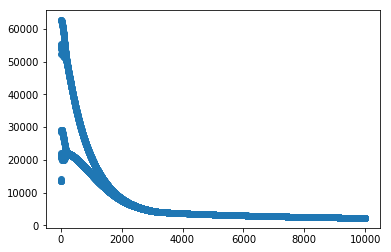

In [11]:
# list chứa tất cả mse
all_Cost = []

# Khởi tạo số vòng lặp
num = 10000

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    w = w - alpha*der 
    
    if i % 500 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [131]:
v = np.zeros((X_Train.shape[1], 1))
v = sp.csc_matrix(w, shape = (len(w),1))

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [121]:
# list chứa tất cả mse
all_Cost = []
v = np.zeros((X_Train.shape[1], 1))
v = sp.csc_matrix(w, shape = (len(w),1))
# Khởi tạo learning rate
gama = 0.001
# Khởi tạo số vòng lặp
num = 10000

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    v = gama*v + alpha*der
    w = w - v 
    
    if i % 500 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

28901


In [9]:
# Lưu bộ tham số xuống file npz
sp.save_npz('D:/Document/Machine_Learning/CS3/w.npz', w)

In [13]:
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))

Cost trên tập test_data: 3022.4976333065533


# SGD Gradient Descent

epoch: 0 Cost =  2272.1545479336937
epoch: 1 Cost =  2272.0195416854203
epoch: 2 Cost =  2271.881947575208
epoch: 3 Cost =  2271.7423898197003
epoch: 4 Cost =  2271.602328983368
epoch: 5 Cost =  2271.462164426172
epoch: 6 Cost =  2271.3219902747255
epoch: 7 Cost =  2271.181828068805
epoch: 8 Cost =  2271.04168270365
epoch: 9 Cost =  2270.901555287979
epoch: 10 Cost =  2270.761446070594
epoch: 11 Cost =  2270.6213551050814
epoch: 12 Cost =  2270.4812824007095
epoch: 13 Cost =  2270.341227956688
epoch: 14 Cost =  2270.201191769942
epoch: 15 Cost =  2270.0611738368807
epoch: 16 Cost =  2269.9211741537947
epoch: 17 Cost =  2269.781192716951
epoch: 18 Cost =  2269.64122952261
epoch: 19 Cost =  2269.501284567033
epoch: 20 Cost =  2269.3613578464806
epoch: 21 Cost =  2269.221449357216
epoch: 22 Cost =  2269.081559095502
epoch: 23 Cost =  2268.9416870576047
epoch: 24 Cost =  2268.8018332397887
epoch: 25 Cost =  2268.661997638321
epoch: 26 Cost =  2268.5221802494693
epoch: 27 Cost =  2268.38238

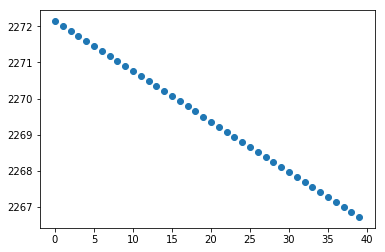

In [101]:
all_Cost = []

num = 40

for i in range(num):
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    

    print("epoch:", i,'Cost = ', err)
    
    for j in range(X_Train.shape[0]):
        der = Derivative(w, y_Train[j], X_Train[j])
        w = w - alpha*der  

print("epoch:", i,'Cost = ', Cost_Function(w, y_Train, X_Train))
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [15]:
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))

Cost trên tập test_data: 3022.4976333065533


In [ ]:
w_final = sp.load_npz('D:/Document/Machine_Learning/CS3/w.npz')

In [80]:
y_pred = Prediction(w, y_test, X_test)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Accuracy

In [99]:
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score(y_pred, y_test.toarray()))

Accuracy =  0.8005664033387986


In [102]:
def Accuracy(y_pred, y_test):
    
    count = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == y_test[i]:
            count += 1
    return count/y_pred.shape[0]

print('Accuracy = ',Accuracy(y_pred, y_test.toarray()))

Accuracy =  0.8005664033387986


In [92]:
# tính tổng số điểm dữ liệu dự đoán có nhãn là 1 đúng
def find_TP(y_pred, y_test):
    count = 0
    Positive = np.multiply(y_pred, y_test)
    return np.count_nonzero(Positive)
TP = find_TP(y_pred, y_test.toarray())

# tính tổng số điểm dữ liệu dự đoán nhãn là 1 nhưng sai
def find_FP(y_pred, y_test):
    count = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == 1:
            if y_test[i] == 0:
                count += 1
    return count
FP = find_FP(y_pred, y_test.toarray())

# tính tống số điểm dữ liệu có nhãn là 1 trong tập test
def find_P(y_pred, y_test):
    return np.count_nonzero(y_test)
P = find_P(y_pred, y_test.toarray())

print(TP, FP,P)

2156 564 2930


# Precision

In [103]:
from sklearn.metrics import precision_score
print("Precision score =",precision_score(y_pred, y_test.toarray()))

Precision score = 0.7358361774744028


In [94]:
def Precision(TP, FP):
    return TP/(TP+FP)
Precision = Precision(TP, FP)
print("Precision score =", Precision)

Precision score = 0.7926470588235294


# Recall

In [95]:
from sklearn.metrics import recall_score
print("Recall score:",recall_score(y_pred, y_test.toarray()))


Recall score: 0.7926470588235294


In [96]:
def Recall(TP, P):
    return TP/P
Recall = Recall(TP, P)
print("Recall score:",Recall)

Recall score: 0.7358361774744028


# F1_score

In [97]:
from sklearn.metrics import f1_score
print("F1_score:",f1_score(y_pred, y_test.toarray()))

F1_score: 0.7631858407079647


In [98]:
def F1_Score(Precision, Recall):
    return (2*(Precision*Recall)/(Precision+Recall))

print("F1_score:",F1_Score(Precision, Recall))

F1_score: 0.7631858407079647
